In [1]:
import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def sum_throughput(trace):
    s = []
    for t in trace:
        trace = pd.read_table(t, header=None, sep=(","),names=("seconds", "rate"))
        if len(s) == 0: s = trace
        else: s += trace
    return s

def format_graph():
    ax.set_ylim(0, 3)
    ax.set_yticks([1, 2, 3])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.f k'))
    #ax.set_xticks([])
    ax.set_xlabel("seconds")
    ax.set_ylabel("ops/second")
    
def graph_it(ax, foreground, background1, background2):
    #s = sum_throughput(foreground)
    #ax.plot(range(0, len(s['rate'])*6, 6), s['rate']/1000, 
    #    'r-', marker='x', linewidth=2.0, label="Sequencer 1")

    #t = sum_throughput(background1)
    #ax.plot(range(0, len(t['rate'])*6, 6), t['rate']/1000, 
    #    'b-', marker='o', linewidth=2.0, label="Sequencer 2")
    
    u = sum_throughput(background2)
    #ax.plot(range(0, len(t['rate'])*6, 6), u['rate']/1000, 
    #    'g-', marker='o', linewidth=2.0, label="Sequencer 2")
    
    ax.plot(range(0, len(t['rate'])*6, 6), (t['rate']+s['rate']+u['rate'])/1000, 
        '--', color='black', linewidth=2.0, label="Total")

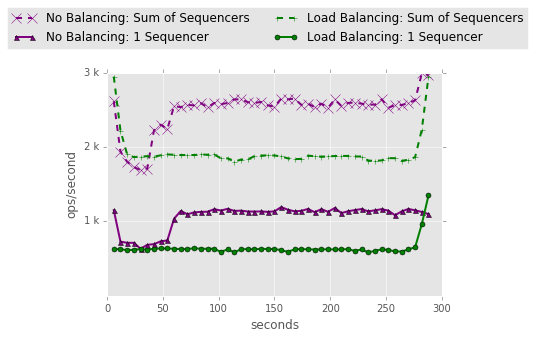

In [3]:
fig = plt.figure()

###
ax = fig.add_subplot(111)

s = sum_throughput(glob.glob("test-foreground-*throughput.csv"))
t = sum_throughput(["test-issdm-14-throughput.csv", "test-issdm-11-throughput.csv", "test-issdm-0-throughput.csv", "test-issdm-1-throughput.csv"])
u = sum_throughput(["test-issdm-24-throughput.csv", "test-issdm-27-throughput.csv", "test-issdm-40-throughput.csv", "test-issdm-20-throughput.csv"])
ax.plot(range(0, len(t['rate'])*6, 6), (t['rate']+s['rate']+u['rate'])/1000, 
        '--', color='purple', marker='x', markersize=10, linewidth=2.0, label="No Balancing: Sum of Sequencers")
ax.plot(range(0, len(t['rate'])*6, 6), (t['rate'])/1000, 
        '-', color='purple', marker='^', markersize=5, linewidth=2.0, label="No Balancing: 1 Sequencer")

s1 = sum_throughput(glob.glob("baseline-foreground-*throughput.csv"))
t1 = sum_throughput(["baseline-issdm-14-throughput.csv", "baseline-issdm-11-throughput.csv", "baseline-issdm-0-throughput.csv", "baseline-issdm-1-throughput.csv"])
u1 = sum_throughput(["baseline-issdm-24-throughput.csv", "baseline-issdm-27-throughput.csv", "baseline-issdm-40-throughput.csv", "baseline-issdm-20-throughput.csv"])

ax.plot(range(0, len(t['rate'])*6, 6), (t1['rate']+s1['rate']+u1['rate'])/1000, 
        'g--', marker='+', markersize=5, linewidth=2.0, label="Load Balancing: Sum of Sequencers")
ax.plot(range(0, len(t['rate'])*6, 6), (s1['rate'])/1000, 
        'g-', marker='o', markersize=5, linewidth=2.0, label="Load Balancing: 1 Sequencer")

lgd = ax.legend(loc='center', ncol=2, bbox_to_anchor=(0.48,1.2))
format_graph()